# Extract data

In [1]:
import json

# Read JSON file
def read_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Extract titles and summaries
def extract_titles_and_summaries(json_data):
    titles = [item.get("title","") for item in json_data]
    abstracts = [item.get("abstract","") for item in json_data]
    return titles, abstracts

# File path (update with actual file path)
file_path = "/kaggle/input/hepth-metadata-file/abs_metadata.json"

data = read_json_file(file_path)
titles, abstracts = extract_titles_and_summaries(data)

len(titles), len(abstracts)


(29555, 29555)

In [2]:
titles[0]


'Combinatorics of the Modular Group II: the Kontsevich integrals'

In [3]:
abstracts[0]


"  We study algebraic aspects of Kontsevich integrals\nas generating functions for intersection theory over moduli space\nand review the derivation of Virasoro and KdV constraints.\n 1. Intersection numbers\n 2. The Kontsevich integral\n  2.1. The main theorem\n  2.2 Expansion of Z on characters and Schur functions\n  2.3 Proof of the first part of the Theorem\n 3. From Grassmannians to KdV\n 4. Matrix Airy equation and Virasoro highest weight conditions\n 5. Genus expansion\n 6. Singular behaviour and Painlev'e equation.\n 7. Generalization to higher degree potentials"

# Data preparation

## Tokenizer

In [4]:
import gensim
data = abstracts

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        # deacc=True removes punctuations
        # simple_preprocess: tokenize, normalize, remove number, special character

data_words = list(sent_to_words(data)) # tokens list

print(data_words[:1])

[['we', 'study', 'algebraic', 'aspects', 'of', 'kontsevich', 'integrals', 'as', 'generating', 'functions', 'for', 'intersection', 'theory', 'over', 'moduli', 'space', 'and', 'review', 'the', 'derivation', 'of', 'virasoro', 'and', 'kdv', 'constraints', 'intersection', 'numbers', 'the', 'kontsevich', 'integral', 'the', 'main', 'theorem', 'expansion', 'of', 'on', 'characters', 'and', 'schur', 'functions', 'proof', 'of', 'the', 'first', 'part', 'of', 'the', 'theorem', 'from', 'grassmannians', 'to', 'kdv', 'matrix', 'airy', 'equation', 'and', 'virasoro', 'highest', 'weight', 'conditions', 'genus', 'expansion', 'singular', 'behaviour', 'and', 'painlev', 'equation', 'generalization', 'to', 'higher', 'degree', 'potentials']]


## Bigram and Trigram 

In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['we', 'study', 'algebraic', 'aspects', 'of', 'kontsevich', 'integrals', 'as', 'generating', 'functions', 'for', 'intersection', 'theory', 'over', 'moduli', 'space', 'and', 'review', 'the', 'derivation', 'of', 'virasoro', 'and', 'kdv', 'constraints', 'intersection', 'numbers', 'the', 'kontsevich', 'integral', 'the', 'main', 'theorem', 'expansion', 'of', 'on', 'characters', 'and', 'schur', 'functions', 'proof', 'of', 'the', 'first', 'part', 'of', 'the', 'theorem', 'from', 'grassmannians', 'to', 'kdv', 'matrix', 'airy', 'equation', 'and', 'virasoro', 'highest_weight', 'conditions', 'genus', 'expansion', 'singular', 'behaviour', 'and', 'painlev', 'equation', 'generalization', 'to', 'higher', 'degree', 'potentials']


## Remove stopwords

In [6]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Check if stopwords are accessible
stop_words = stopwords.words('english')
print(stop_words)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [7]:
from gensim.utils import simple_preprocess
import spacy

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[3])

['define', 'heterotic', 'superstre', 'action', 'super', 'worldsheet', 'rather', 'ordinary', 'many', 'problem', 'interact', 'superstring', 'formalism', 'solve', 'light_cone', 'approach', 'transform', 'super', 'worldsheet', 'super', 'riemann_surface', 'allow', 'elimination', 'non', 'trivial', 'interaction', 'point', 'operator', 'complicate', 'evaluation', 'scatter', 'amplitude', 'polyakov', 'approach', 'dimensional', 'heterotic', 'covariant', 'action', 'define', 'super', 'worldsheet', 'gauge', 'fix', 'free', 'field', 'action', 'anomalous', 'superconformal', 'invariance', 'integrate', 'exponential', 'covariant', 'action', 'puncture', 'super', 'riemann_surface', 'produce', 'scatter', 'amplitude', 'closely_resemble', 'amplitude', 'obtain', 'use', 'unitary', 'light_cone', 'approach']


# LDA Topic model 

### Transform data

In [8]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1)]]


In [9]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('airy', 1),
  ('algebraic', 1),
  ('aspect', 1),
  ('behaviour', 1),
  ('character', 1),
  ('condition', 1),
  ('constraint', 1),
  ('degree', 1),
  ('derivation', 1),
  ('equation', 2),
  ('expansion', 2),
  ('first', 1),
  ('function', 2),
  ('generalization', 1),
  ('generate', 1),
  ('genus', 1),
  ('grassmannian', 1),
  ('high', 1),
  ('integral', 2),
  ('intersection', 2),
  ('kdv', 1),
  ('kontsevich', 2),
  ('main', 1),
  ('matrix', 1),
  ('number', 1),
  ('painlev', 1),
  ('part', 1),
  ('potential', 1),
  ('proof', 1),
  ('schur', 1),
  ('singular', 1),
  ('study', 1),
  ('theorem', 2),
  ('theory', 1),
  ('virasoro', 1)]]

### Train model

In [10]:
import os

# Tạo thư mục nếu chưa có
os.makedirs("/kaggle/working/lda_model", exist_ok=True)

In [11]:
# Build LDA model
for i in range(1,21):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=5,
                                               alpha='auto',
                                               per_word_topics=True)
    lda_model.save(f"/kaggle/working/lda_model/model_lda_100_{i}.model")

### Coherence eval

In [12]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

perplexities = []
coherences = []

for i in range(1,21):
    # Load model
    lda_model = LdaModel.load(f"/kaggle/working/lda_model/model_lda_100_{i}.model")
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    coherences.append(coherence_lda)


Coherence Score:  0.34626726730875756

Coherence Score:  0.393000575655046

Coherence Score:  0.4243238011849093

Coherence Score:  0.4595182095773743

Coherence Score:  0.47630802927296045

Coherence Score:  0.46785830782781407

Coherence Score:  0.4584127104791244

Coherence Score:  0.4361666719112623

Coherence Score:  0.4023633592925813

Coherence Score:  0.45120058022644793

Coherence Score:  0.39202311366172055

Coherence Score:  0.39813324299228986

Coherence Score:  0.40498497233942926

Coherence Score:  0.41820496427585185

Coherence Score:  0.40996401322288256

Coherence Score:  0.36476968037309665

Coherence Score:  0.3555908260990459

Coherence Score:  0.3533624447062734

Coherence Score:  0.3156980728177688

Coherence Score:  0.3319117854470546


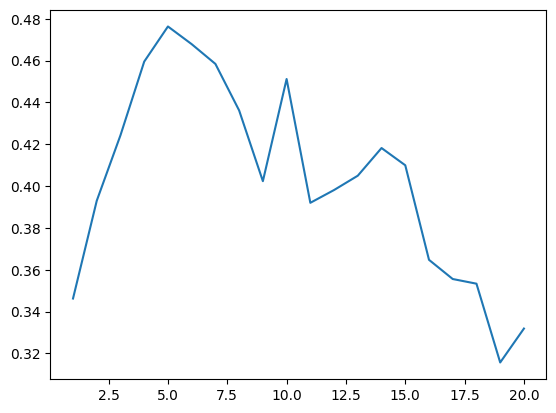

In [13]:
# Visualize coherences
import matplotlib.pyplot as plt
index = range(1,21)
plt.plot(index, coherences)
plt.show()

In [14]:
from gensim.models.ldamodel import LdaModel

# Tìm số topic có coherence cao nhất
best_num_topics = coherences.index(max(coherences)) + 1   # +1 vì range(1,21)

print(f"Best model có {best_num_topics} topics, coherence = {max(coherences)}")

# Load lại model tốt nhất
lda_model = LdaModel.load(f"/kaggle/working/lda_model/model_lda_100_{best_num_topics}.model")


Best model có 5 topics, coherence = 0.47630802927296045


### Show topic distribution

In [15]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
mlxte

In [16]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.107534  0.013393       1        1  43.600891
2     -0.198184  0.154758       2        1  18.954281
0     -0.079052  0.110515       3        1  16.287049
1     -0.005223 -0.378337       4        1  11.391366
4      0.389992  0.099672       5        1   9.766413, topic_info=            Term          Freq         Total Category  logprob  loglift
33        theory  30389.000000  30389.000000  Default  30.0000  30.0000
67         field  22571.000000  22571.000000  Default  29.0000  29.0000
103        gauge  14630.000000  14630.000000  Default  28.0000  28.0000
83        string  14677.000000  14677.000000  Default  27.0000  27.0000
201     solution  10284.000000  10284.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
361         mass   1798.911938   3541.586849   Topic5  -4.3367   1.6488
990        extra    911.978715   1507.280137   Topic5  -5.0160   1.8238
183    invariant   1115.476181   3264.946490   Topic5  -4.8146   1.2523
1362  lagrangian    887.202015   1513.338124   Topic5  -5.0435   1.7922
365        order    895.793623   5430.437148   Topic5  -5.0339   0.5242

[292 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
448       4  0.999807        _
758       1  0.004323  abelian
758       5  0.995222  abelian
87        5  0.999881   action
2142      2  0.999690       ad
...     ...       ...      ...
787       1  0.999535      way
426       5  0.998201     weyl
5291      2  0.999665     wrap
506       4  0.998450    write
1073      4  0.999411        z

[406 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

In [17]:
import pandas as pd

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df._append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               3              0.4580   
1            1               3              0.7258   
2            2               3              0.6188   
3            3               3              0.4179   
4            4               3              0.3894   
5            5               3              0.4701   
6            6               2              0.4589   
7            7               3              0.6708   
8            8               0              0.4448   
9            9               3              0.5703   

                                            Keywords  \
0  brane, model, space, show, field, equation, qu...   
1  brane, model, space, show, field, equation, qu...   
2  brane, model, space, show, field, equation, qu...   
3  brane, model, space, show, field, equation, qu...   
4  brane, model, space, show, field, equation, qu...   
5  brane, model, space, show, field, equation, qu...   
6  theory, string, type, dimension, supersymmetri...   
7  brane, model, space, show, field, equation, qu...   
8  solution, energy, black, hole, constant, cosmo...   
9  brane, model, space, show, field, equation, qu...   

                                                Text  
0    We study algebraic aspects of Kontsevich int...  
1    The quantum deformed (1+1) Poincare' algebra...  
2    In these lecture notes we review the various...  
3    By defining the heterotic Green-Schwarz supe...  
4    I study the Ward identities of the $w_\infty...  
5    We describe few aspects of the quantum symme...  
6    We study supersymmetric domain walls in N=1 ...  
7    The Coulomb gas representations are presente...  
8    The simplest toroidally compactified string ...  
9    The Ward identities in Kontsevich-like 1-mat...

# NMF Topic Model

In [18]:
import os

# Tạo thư mục nếu chưa có
os.makedirs("/kaggle/working/nmf_model", exist_ok=True)

/usr/local/lib/python3.11/dist-packages/gensim/models/nmf.py:578: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.11/dist-packages/gensim/models/nmf.py:607: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.11/dist-packages/gensim/models/nmf.py:620: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.11/dist-packages/gensim/models/nmf.py:620: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespac

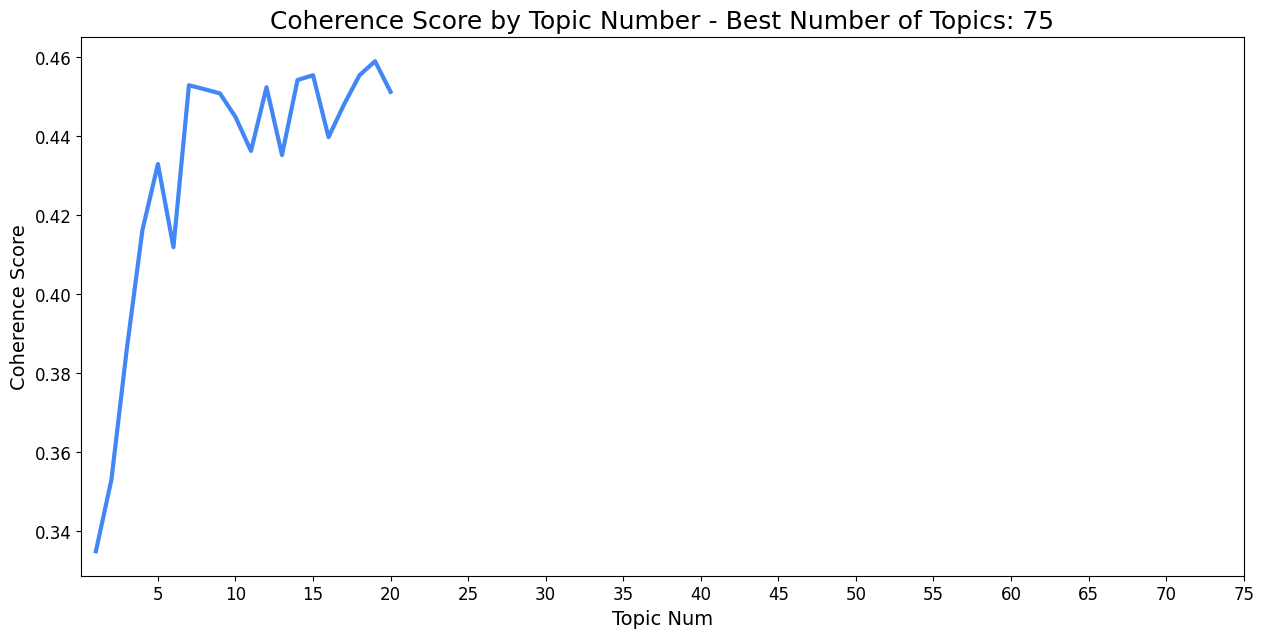

In [19]:
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter


# Tạo danh sách các số lượng chủ đề cần thử nghiệm
topic_nums = list(np.arange(5, 75 + 1, 5))

# Tính toán Coherence Score cho từng số lượng chủ đề
coherence_scores = []
# topic_nums = list(range(1, 21))

for num in range(1,21):
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=id2word,
        chunksize=100,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=100,
        w_stop_condition=0.0001,
        h_max_iter=50,
        h_stop_condition=0.01,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    nmf.save(f"/kaggle/working/nmf_model/model_nmf_100_{num}.model")

    # Tính Coherence Score
    cm = CoherenceModel(
        model=nmf,
        texts=data_lemmatized,
        dictionary=id2word,
        coherence='c_v'
    )

    coherence_scores.append(round(cm.get_coherence(), 5))

# Tìm số lượng chủ đề có Coherence Score cao nhất
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Vẽ biểu đồ kết quả
fig = plt.figure(figsize=(15, 7))

plt.plot(
    list(range(1,21)),
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [20]:
scores = list(zip(list(range(1,21)), coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

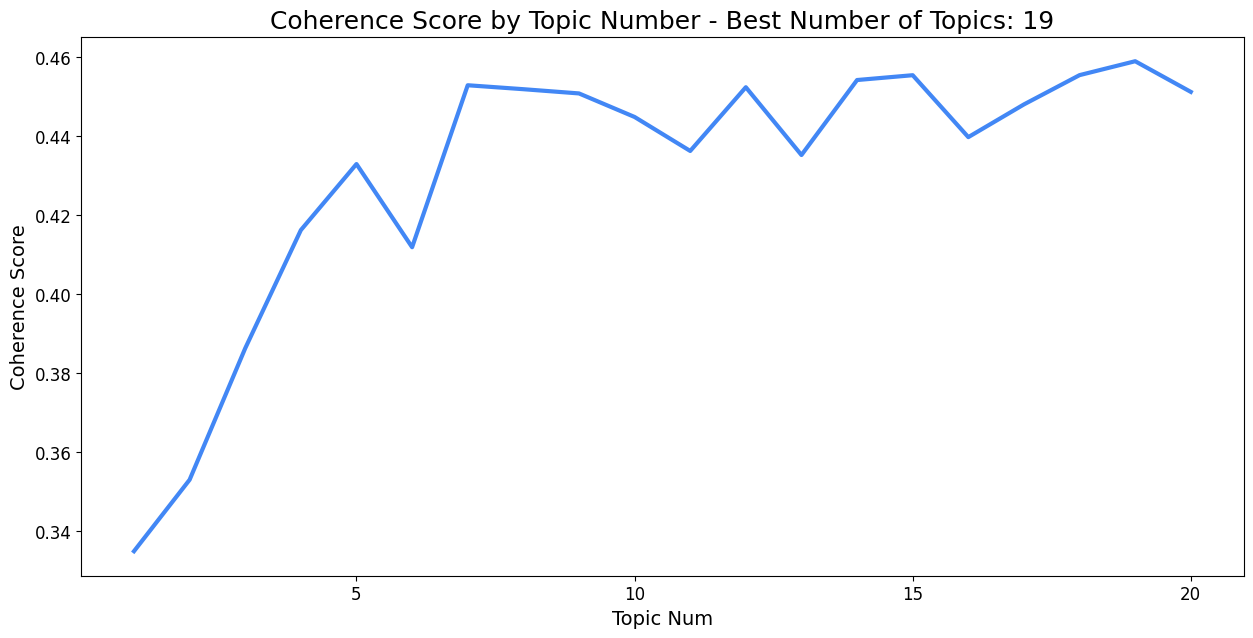

In [21]:
# Vẽ biểu đồ kết quả
fig = plt.figure(figsize=(15, 7))

plt.plot(list(range(1,21)),coherence_scores,linewidth=3,color='#4287f5')
plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(list(range(1,21))) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd

# Tạo dữ liệu văn bản từ danh sách tài liệu đã lemmatized
texts = [" ".join(doc) for doc in data_lemmatized]  # Kết hợp các từ đã lemmatization thành chuỗi

# Tạo các trọng số TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2)
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Lưu lại các tên đặc trưng để dùng cho việc tóm tắt chủ đề
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Chạy mô hình NMF với số lượng chủ đề tốt nhất từ các bước trước
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

# Lấy các từ khóa cho từng chủ đề
topic_keywords = []
for topic_idx, topic in enumerate(nmf.components_):
    keywords = [tfidf_fn[i] for i in topic.argsort()[:-11:-1]]  # Lấy top 10 từ khóa
    topic_keywords.append(", ".join(keywords))

# Tạo DataFrame chứa thông tin về các chủ đề và từ khóa
df_topics = pd.DataFrame({
    'Topic': range(best_num_topics),
    'Keywords': topic_keywords
})

# Hiển thị 10 chủ đề đầu tiên
print(df_topics.head(17))


    Topic                                           Keywords
0       0  function, point, correlation, correlation func...
1       1  black, hole, black hole, entropy, horizon, ext...
2       2  brane, configuration, brane brane, bulk, brane...
3       3  string, string theory, open, open string, theo...
4       4  gauge, gauge theory, theory, gauge field, inva...
5       5  cosmological, constant, gravity, cosmological ...
6       6  theory, duality, type, supergravity, dual, sup...
7       7  solution, soliton, exact, find, charge, superg...
8       8  action, effective, effective action, term, bac...
9       9  equation, system, motion, equation motion, sel...
10     10  boundary, condition, boundary condition, bound...
11     11  model, chiral, symmetry, lattice, minimal, sta...
12     12  space, time, space time, dimensional, ad, phas...
13     13  field, field theory, theory, conformal, confor...
14     14  state, particle, bind, bind state, spin, charg...
15     15  algebra, oper

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


In [23]:
import pandas as pd

# Tạo ma trận trọng số tài liệu-chủ đề với mô hình NMF
docweights = nmf.transform(tfidf)

# Số lượng từ hàng đầu cho mỗi chủ đề
n_top_words = 8

# Hàm tạo bảng từ khóa cho các chủ đề
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[topic_idx] = top_words
    return pd.DataFrame.from_dict(topics, orient='index')

# Tạo DataFrame với các từ hàng đầu cho mỗi chủ đề
topic_df = topic_table(nmf, tfidf_fn, n_top_words).T

# Tóm tắt từ khóa của từng chủ đề
# Ghép các từ thành chuỗi và xử lý trùng lặp
topic_df['topics'] = topic_df.apply(lambda x: ' '.join(x), axis=1) # Ghép từ của mỗi chủ đề thành một chuỗi
topic_df['topics'] = topic_df['topics'].apply(lambda x: " ".join(sorted(set(x.split()), key=x.split().index)))  # Loại bỏ từ trùng lặp

# Hiển thị các chủ đề
topic_df.head(17)


0              1                    2              3  \
0              function          black                brane         string   
1                 point           hole        configuration  string theory   
2           correlation     black hole          brane brane           open   
3  correlation function        entropy                 bulk    open string   
4             partition        horizon  brane configuration         theory   
5    partition function       extremal          worldvolume   string field   
6              operator  hole solution           background     background   
7        point function         charge         world_volume      heterotic   

                 4                      5               6               7  \
0            gauge           cosmological          theory        solution   
1     gauge theory               constant         duality         soliton   
2           theory                gravity            type           exact   
3      gauge field  cosmological constant    supergravity            find   
4        invariant            dimensional            dual          charge   
5  gauge invariant              dimension   supersymmetry    supergravity   
6            group               universe  supersymmetric        monopole   
7      gauge group                   bulk     dimensional  exact solution   

                  8                9                  10              11  \
0            action         equation            boundary           model   
1         effective           system           condition          chiral   
2  effective action           motion  boundary condition        symmetry   
3              term  equation motion      boundary state         lattice   
4        background             self                bulk         minimal   
5              loop      hamiltonian                  ad        standard   
6        low energy             form          reflection  standard model   
7  energy effective       constraint                open     topological   

            12               13          14              15             16  \
0        space            field       state         algebra         matrix   
1         time     field theory    particle        operator   matrix model   
2   space time           theory        bind  representation  matrix theory   
3  dimensional        conformal  bind state             lie         theory   
4           ad  conformal field        spin           group          limit   
5  phase space           scalar      charge     lie algebra          large   
6     manifold    quantum field    spectrum       construct    large limit   
7       metric     scalar field    magnetic       structure         random   

                 17           18  \
0           quantum       energy   
1         classical        order   
2            system  temperature   
3          mechanic        phase   
4  quantum mechanic    potential   
5           gravity         loop   
6     quantum field   transition   
7             group       result   

                                              topics  
0  function black brane string gauge cosmological...  
1  point hole configuration string theory gauge c...  
2  correlation black hole brane open theory gravi...  
3  correlation function entropy bulk open string ...  
4  partition horizon brane configuration theory i...  
5  partition function extremal worldvolume string...  
6  operator hole solution background group univer...  
7  point function charge world_volume heterotic g...